###### Process Optimization of Photonic Curing for Perovskites on Willow Glass

### Batch 2 Data Analysis 
### Teacher model reproduce from the Group 2 analysis ensemble model

Weijie Xu (UT Dallas), 

In collaboration with Zhe Liu (NPU), 


V1.0 - 2022.09.16

Install Anaconda and open this notebook in Jupyter

Requires Emukit package and its dependent packages (pyDOE, GPy, etc.)

    e.g. pip intall emukit (maybe, pip install pyDOE)

Experimental information:
Batch 0: LHS batch is 16 experimental conditions 
Batch 1: acquisition batch is 8 experimental conditions from BO and 8 from LHS in the unknown region
    - Upper bound for PC length was extended to 100 ms. 
Batch 2: acquisition batch is 16 experimental conditions from BO
    - Resolution (or step) of MAPbI3 concentration to 0.05 M
    - Resolution (or step) of CH2I2 concentration to 5 uL
    - Lower bound for MAPbI3 concentration was extended to 1.2

Samples: 6 pixel cells per substrate, and 2 duplicates per condition

Parameter resolution (Finest grid we are able to/are willing to tune). 
- Molar Concentration MAPbI3 - 0.05 M
- Addition of CH2I2 - 5 uL
- PC voltage - no limit (willing to tune 1 V)
- PC pulse-length - no limit (willing to tune 0.1 ms)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

## Import the dataset for the teacher model

In [2]:
df_data = pd.read_excel('./Group0_run1&2_J-V_Data_BM.xlsx')
#df_data = df_data[np.logical_or(df_data['Scan Direction'] == 0, df_data['Scan Direction'] == 'F
df_data = df_data.iloc[:158,:14]
#df_data = df_data.drop(columns = ['PCE Standard Deviation (per run, %)'])
df_data = df_data.sort_values(by=list(df_data.iloc[:,[0,11]].columns)).drop_duplicates('Condition', 
                                                                                        keep = 'last', 
                                                                                        ignore_index = True)
df_group0 = df_data
print('Group 0:', len(df_group0))

df_data = pd.read_excel('./Group1_run1&2_J-V_Data.xlsx')
df_data = df_data.iloc[:108,:14]
df_data['Condition'] = df_data['Condition']+16
#df_data = df_data.drop(columns = ['PCE Standard Deviation (per run, %)'])
#df_data = df_data[np.logical_or(df_data['Scan Direction'] == 0, df_data['Scan Direction'] == 'F')]
df_data = df_data.sort_values(by=list(df_data.iloc[:,[0,11]].columns)).drop_duplicates('Condition', 
                                                                                        keep = 'last', 
                                                                                        ignore_index = True)
df_group1 = df_data
print('Group 1:', len(df_group1))

df_data = pd.read_excel('./Group2_run1&2&3_J-V_Data.xlsx')
df_data = df_data.iloc[:216,:14]
#df_data = df_data.drop(columns = ['PCE Standard Deviation (per run, %)'])
#df_data = df_data[np.logical_or(df_data['Scan Direction'] == 0, df_data['Scan Direction'] == 'F')]
df_data = df_data.sort_values(by=list(df_data.iloc[:,[0,11]].columns)).drop_duplicates('Condition', 
                                                                                        keep = 'last', 
                                                                                        ignore_index = True)
df_group2 = df_data
print('Group 2:', len(df_group2))


df_data = pd.concat([df_group0, df_group1,df_group2], ignore_index = True)
df_data

Group 0: 16
Group 1: 16
Group 2: 16


,Condition,MAPbI Conc [M],CH2I2 Conc [uL],Final Conc [M],PC voltage [V],PC length [ms],Sample,Diode,Voc [V],Jsc [mA/cm2],FF,PCE [%],Scan Direction,Run
0,0,1.60,150,1.319626,433,18.3,0,1.0,0.000,0.00,0.000,0.00,F,1.0
1,1,1.50,50,1.400794,222,17.1,1,2.0,0.907,2.15,0.520,1.02,R,1.0
2,2,1.50,100,1.313896,373,6.3,2,2.0,0.768,16.03,0.622,7.66,F,1.0
3,3,1.30,100,1.138710,252,11.1,3,4.0,0.712,2.69,0.456,0.87,F,1.0
4,4,1.60,100,1.401489,237,9.9,4,4.0,0.859,1.59,0.507,0.69,F,1.0
5,5,1.50,50,1.400794,358,12.3,5,3.0,0.476,17.20,0.413,3.38,F,2.0
6,6,1.40,0,1.400000,312,15.9,6,2.0,0.845,13.63,0.536,6.17,R,1.0
7,7,1.50,250,1.107741,328,19.5,7,1.0,0.991,16.59,0.656,10.78,F,2.0
8,8,1.60,200,1.246799,297,2.7,8,3.0,0.928,6.82,0.595,3.77,F,2.0
9,9,1.40,200,1.090949,267,7.5,9,6.0,0.935,4.08,0.498,1.90,F,1.0


In [3]:
df = df_data.iloc[:48,[1,2,4,5,8,9,10,11]]
df.columns = ['MAPbI Conc [M]', "CH₂I₂ Conc [μL]", "PC voltage [V]", 
              'PC length [ms]', 'Voc [V]', 'Jsc [mA/cm²]','FF [%]','PCE [%]']
for i in np.arange(len(df)):
    if df['PCE [%]'].values[i] == 0:
        df.iloc[i,7]=0.5
    if df['PCE [%]'].values[i] == 'bad':
        df.iloc[i,7]=0.5

df

,MAPbI Conc [M],CH₂I₂ Conc [μL],PC voltage [V],PC length [ms],Voc [V],Jsc [mA/cm²],FF [%],PCE [%]
0,1.60,150,433,18.3,0.000,0.00,0.000,0.50
1,1.50,50,222,17.1,0.907,2.15,0.520,1.02
2,1.50,100,373,6.3,0.768,16.03,0.622,7.66
3,1.30,100,252,11.1,0.712,2.69,0.456,0.87
4,1.60,100,237,9.9,0.859,1.59,0.507,0.69
5,1.50,50,358,12.3,0.476,17.20,0.413,3.38
6,1.40,0,312,15.9,0.845,13.63,0.536,6.17
7,1.50,250,328,19.5,0.991,16.59,0.656,10.78
8,1.60,200,297,2.7,0.928,6.82,0.595,3.77
9,1.40,200,267,7.5,0.935,4.08,0.498,1.90


## Define the parameter space

In [4]:
import emukit
import GPy
from emukit.core import ParameterSpace, ContinuousParameter, DiscreteParameter
from emukit.core.initial_designs.random_design import RandomDesign
from emukit.core.initial_designs.latin_design import LatinDesign

In [5]:
MAPbI_conc_min, MAPbI_conc_max, MAPbI_conc_step = [1.2, 1.6, 0.05]  # Unit: V 
### Give step a scaling factor of 0.1 to avoid numercial errors such as 1.7000002
MAPbI_conc_var = np.arange(MAPbI_conc_min, MAPbI_conc_max+MAPbI_conc_step*0.1, MAPbI_conc_step)
MAPbI_conc_num = len(MAPbI_conc_var)

CH2I2_conc_min, CH2I2_conc_max, CH2I2_conc_step = [0, 250, 5] ## Unit: μL
CH2I2_conc_var = np.arange(CH2I2_conc_min, CH2I2_conc_max+CH2I2_conc_step*0.1, CH2I2_conc_step)
CH2I2_conc_num = len(CH2I2_conc_var)

PC_volt_min, PC_volt_max, PC_volt_step = [200, 440, 1] ## Unit: V
PC_volt_var = np.arange(PC_volt_min, PC_volt_max+PC_volt_step*0.1, PC_volt_step) 
PC_volt_num = len(PC_volt_var)

PC_len_min, PC_len_max, PC_len_step = [1, 100, 0.1]  ## Unit: ms
PC_len_var = np.arange(PC_len_min, PC_len_max+PC_len_step*0.1, PC_len_step)
PC_len_num = len(PC_len_var)

var_array = [MAPbI_conc_var,
             CH2I2_conc_var, 
             PC_volt_var, 
             PC_len_var]

x_labels =  ["MAPbI Conc [M]",
             "CH₂I₂ Conc [μL]",
             "PC voltage [V]", 
             "PC length [ms]"]

def x_normalizer(X, var_array = var_array):
    
    def max_min_scaler(x, x_max, x_min):
        return (x-x_min)/(x_max-x_min)
    x_norm = []
    for x in (X):
        x_norm.append([max_min_scaler(x[i], 
                         max(var_array[i]), 
                         min(var_array[i])) for i in range(len(x))])
            
    return np.array(x_norm)

def x_denormalizer(x_norm, var_array = var_array):
    
    def max_min_rescaler(x, x_max, x_min):
        return x*(x_max-x_min)+x_min
    x_original = []
    for x in (x_norm):
           x_original.append([max_min_rescaler(x[i], 
                              max(var_array[i]), 
                              min(var_array[i])) for i in range(len(x))])

    return np.array(x_original)


def get_closest_value(given_value, array_list):
    absolute_difference_function = lambda list_value : abs(list_value - given_value)
    closest_value = min(array_list, key=absolute_difference_function)
    return closest_value
    
def get_closest_array(suggested_x, var_list):
    modified_array = []
    for x in suggested_x:
        modified_array.append([get_closest_value(x[i], var_list[i]) for i in range(len(x))])
    return np.array(modified_array)

In [6]:
parameter_space = ParameterSpace([ContinuousParameter('MAPbI_conc', 0-1/(MAPbI_conc_num-1)/2, 1+1/(MAPbI_conc_num-1)/2),
                                  ContinuousParameter('CH2I2_conc', 0-1/(CH2I2_conc_num-1)/2, 1+1/(CH2I2_conc_num-1)/2),
                                  ContinuousParameter('PC_volt', 0-1/(PC_volt_num-1)/2, 1+1/(PC_volt_num-1)/2),
                                  ContinuousParameter('PC_len', 0-1/(PC_len_num-1)/2, 1+1/(PC_len_num-1)/2),
                                  ])



In [7]:
x_exp = x_normalizer(df.iloc[:,0:4].values)
y_exp = np.transpose([df.iloc[:,-1].values])
X, Y = [x_exp, y_exp]

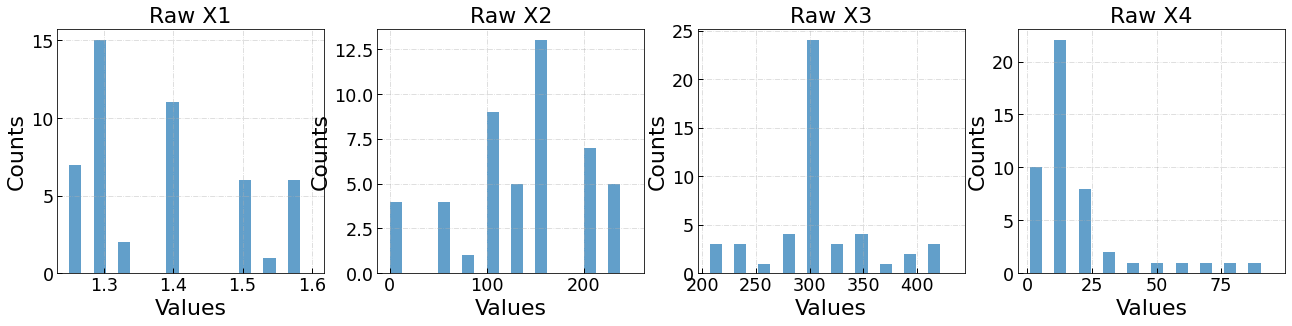

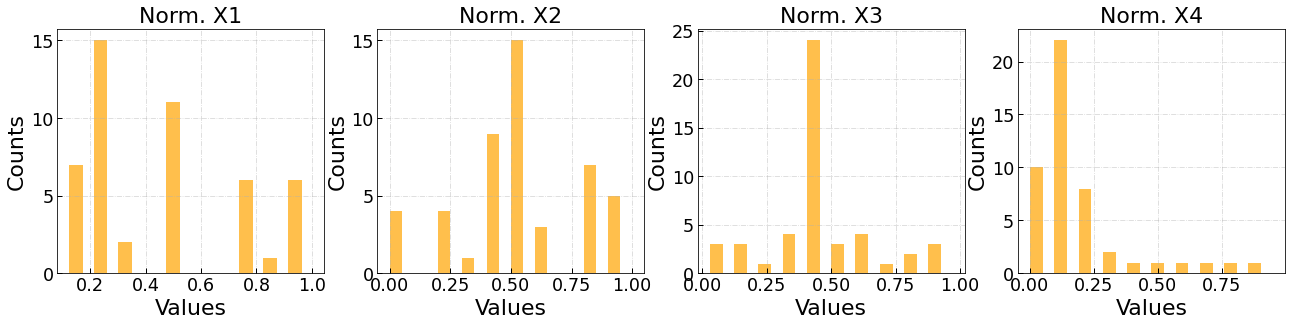

In [8]:
fig, axes = plt.subplots(1, 4, figsize=(5.5*4, 4.5))
fs = 22

for i in np.arange(4):
    max_min = (np.max(df.iloc[:, i].values)-np.min(df.iloc[:, i].values))
    axes[i].hist(np.array(df.iloc[:, i].values), bins =10, width = 0.05*max_min, alpha = 0.7)
    axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
    axes[i].grid(True, linestyle='-.')
    axes[i].set_xlabel('Values', fontsize = fs)
    axes[i].set_ylabel('Counts', fontsize = fs)
    axes[i].set_title('Raw X'+str(i+1), fontsize = fs)
plt.show()


fig, axes = plt.subplots(1, 4, figsize=(5.5*4, 4.5))
fs = 22

for i in np.arange(4):
    axes[i].hist(np.array(X[:, i]), bins =10, width = 0.05, alpha = 0.7, color = 'orange')
    axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
    axes[i].grid(True, linestyle='-.')
    axes[i].set_xlabel('Values', fontsize = fs)
    axes[i].set_ylabel('Counts', fontsize = fs)
    axes[i].set_title('Norm. X'+str(i+1), fontsize = fs)
plt.show()

## Data normalization

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
#scalerY= StandardScaler() 
scalerY = QuantileTransformer(n_quantiles = 48)
y_norm =  scalerY.fit_transform(Y)

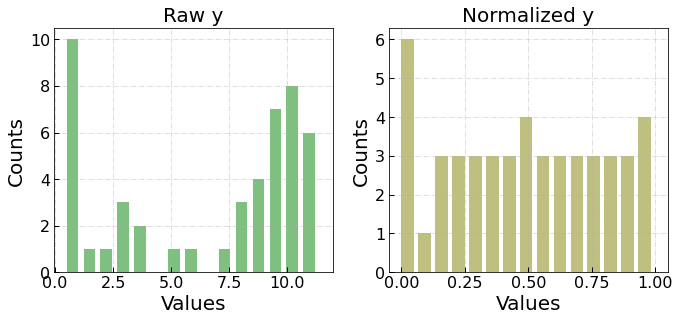

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(5.5*2, 4.5))
fs = 20

ax = axes[0]
ax.hist(np.array(Y), bins =15, width = 0.5, alpha = 0.5, color = 'green')
ax.tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
ax.grid(True, linestyle='-.')
ax.set_title('Raw y', fontsize = fs)
ax.set_xlabel('Values', fontsize = fs)
ax.set_ylabel('Counts', fontsize = fs)


ax = axes[1]
ax.hist(np.array(y_norm), bins =15, width = 0.05, alpha = 0.5, color = 'olive')
ax.tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
ax.grid(True, linestyle='-.')
ax.set_title('Normalized y', fontsize = fs)
ax.set_xlabel('Values', fontsize = fs)
ax.set_ylabel('Counts', fontsize = fs)

plt.show()

In [11]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score
from scipy.stats import spearmanr as spr

def plt_true_vs_pred (y_true_list, y_pred_list, title_str_list, color_list):
    fig, axes = plt.subplots(1, 2, figsize=(5.5*2, 4.5))
    fs = 18
    for i in np.arange(len(axes)):
        ## inverse transform 
        y_true = y_true_list[i]
        y_pred = y_pred_list[i]
        

        lims1 = (0*0.9, 5000*1.1)
        axes[i].scatter(y_true, y_pred, alpha = 0.6, c = color_list[i])
        axes[i].plot(lims1, lims1, 'k--', alpha=0.75, zorder=0)
        rmse_value = np.sqrt(mse(y_true, y_pred))
        mae_value = mae(y_true, y_pred)
        mape_value = mape(y_true, y_pred)
        spearman_value = spr(y_true, y_pred)[0]
        
        print(title_str_list[i],'RMSE:', np.around(rmse_value,3))
        print(title_str_list[i],'MAE:',  np.around(mae_value,3))
        print(title_str_list[i],'MAPE:',  np.around(mape_value,3))
        print(title_str_list[i],'spearman coeff.:',  np.around(spearman_value,3))


        title = title_str_list[i] + " (SPRMan=%.2f" % spearman_value+')'
        axes[i].set_xlabel('Ground Truth', fontsize = fs)
        axes[i].set_ylabel('Prediction', fontsize = fs)
        axes[i].set_title(title, fontsize = fs)
        axes[i].set_xlim(0,15)
        axes[i].set_ylim(0,15)
        #axes[i].set_yscale('log')
        #axes[i].set_xscale('log')

        axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
        axes[i].grid(True, linestyle='-.')

        
    plt.subplots_adjust(wspace = 0.4)
    plt.show()

### Random Forest Regression

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_norm, test_size = 0.33, random_state=21)

rf_regr = RandomForestRegressor(n_estimators=100, max_depth = 5)# criterion="squared_error",'absolute_error'
rf_regr.fit(X_train,y_train.ravel())
y_pred_train = rf_regr.predict(X_train)
y_pred_test = rf_regr.predict(X_test)


y_train_org = scalerY.inverse_transform(y_train.reshape(-1,1))
y_test_org = scalerY.inverse_transform(y_test.reshape(-1,1))
y_pred_train_org = scalerY.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = scalerY.inverse_transform(y_pred_test.reshape(-1,1))

RFR - Train RMSE: 1.365
RFR - Train MAE: 0.821
RFR - Train MAPE: 0.448
RFR - Train spearman coeff.: 0.98
RFR -  Test RMSE: 3.81
RFR -  Test MAE: 2.67
RFR -  Test MAPE: 2.48
RFR -  Test spearman coeff.: 0.664


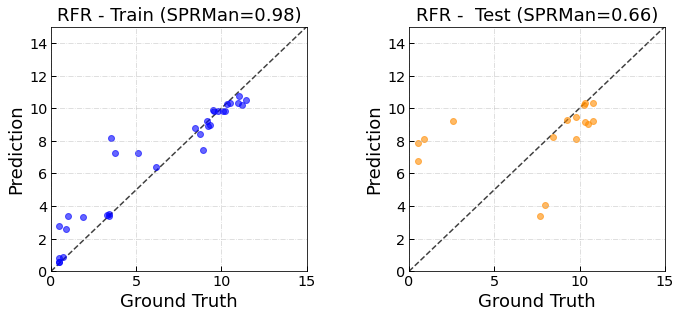

In [13]:
plt_true_vs_pred([y_train_org, y_test_org], 
                 [y_pred_train_org, y_pred_test_org], 
                 ['RFR - Train','RFR -  Test'],
                 ['blue', 'darkorange'])

### Gradient Boosting Regression

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_norm, test_size = 0.33, random_state=1)

gb_regr = GradientBoostingRegressor(n_estimators=30, max_depth = 3)#{‘squared_error’, ‘absolute_error’, ‘huber’, ‘quantile’}
gb_regr.fit(X_train,y_train.ravel())
y_pred_train = gb_regr.predict(X_train)
y_pred_test = gb_regr.predict(X_test)

y_train_org = scalerY.inverse_transform(y_train.reshape(-1,1))
y_test_org = scalerY.inverse_transform(y_test.reshape(-1,1))
y_pred_train_org = scalerY.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = scalerY.inverse_transform(y_pred_test.reshape(-1,1))


GBDT - Train RMSE: 0.96
GBDT - Train MAE: 0.515
GBDT - Train MAPE: 0.186
GBDT - Train spearman coeff.: 0.989
GBDT -  Test RMSE: 3.346
GBDT -  Test MAE: 2.105
GBDT -  Test MAPE: 1.837
GBDT -  Test spearman coeff.: 0.815


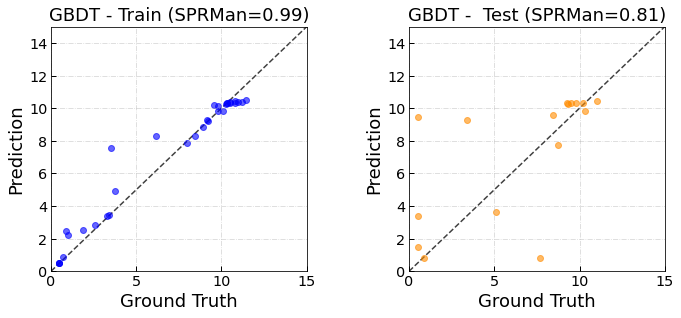

In [15]:
plt_true_vs_pred([y_train_org, y_test_org], 
                 [y_pred_train_org, y_pred_test_org], 
                 ['GBDT - Train','GBDT -  Test'],
                 ['blue', 'darkorange'])

### Neural Network Regression

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y_norm, test_size = 0.33, random_state=1)

NN_regr = MLPRegressor(hidden_layer_sizes = [56, 56, 56], alpha = 0.01, activation = 'relu',
                         max_iter = 2000, solver='adam',verbose=False,
                         tol=1e-8)
NN_regr.fit(X_train,y_train.ravel())
y_pred_train = NN_regr.predict(X_train)
y_pred_test = NN_regr.predict(X_test)

y_train_org = scalerY.inverse_transform(y_train.reshape(-1,1))
y_test_org = scalerY.inverse_transform(y_test.reshape(-1,1))
y_pred_train_org = scalerY.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = scalerY.inverse_transform(y_pred_test.reshape(-1,1))

 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning:Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.


NN - Train RMSE: 0.198
NN - Train MAE: 0.126
NN - Train MAPE: 0.027
NN - Train spearman coeff.: 0.995
NN -  Test RMSE: 3.745
NN -  Test MAE: 2.232
NN -  Test MAPE: 2.066
NN -  Test spearman coeff.: 0.499


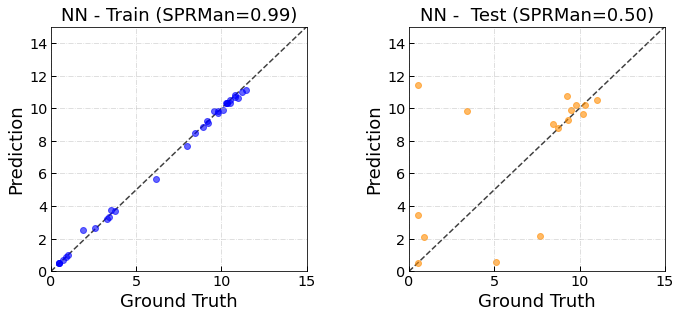

In [17]:
plt_true_vs_pred([y_train_org, y_test_org], 
                 [y_pred_train_org, y_pred_test_org], 
                 ['NN - Train','NN -  Test'],
                 ['blue', 'darkorange'])

### Gaussian Process Pregression

In [18]:
import GPy
from GPy.models import GPRegression
from emukit.model_wrappers import GPyModelWrapper
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_norm, test_size = 0.33, random_state=1)

ker = GPy.kern.Matern52(input_dim = 4, ARD =True)#
ker.lengthscale.constrain_bounded(1e-2, 1)
ker.variance.constrain_bounded(1e-2, 100.0)
gpy_regr = GPRegression(X_train,y_train, ker)#Emukit is a minimization tool; need to make Y negative
# gpy_regr.Gaussian_noise.variance = (0.5)**2
# gpy_regr.Gaussian_noise.variance.fix()
gpy_regr.randomize()
gpy_regr.optimize_restarts(num_restarts=20,verbose =False, messages=False)
print(ker.lengthscale)
print(ker.variance)
print(gpy_regr.Gaussian_noise)


y_pred_train, y_uncer_train= gpy_regr.predict(X_train)
y_pred_test, y_uncer_test = gpy_regr.predict(X_test)

y_train_org = scalerY.inverse_transform(y_train.reshape(-1,1))
y_test_org = scalerY.inverse_transform(y_test.reshape(-1,1))
y_pred_train_org = scalerY.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = scalerY.inverse_transform(y_pred_test.reshape(-1,1))

reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


  index  |  GP_regression.Mat52.lengthscale  |  constraints  |  priors
  [0]    |                       0.66796285  |   0.01,1.0    |        
  [1]    |                       0.66009968  |   0.01,1.0    |        
  [2]    |                       0.43818615  |   0.01,1.0    |        
  [3]    |                       0.17110991  |   0.01,1.0    |        
  index  |  GP_regression.Mat52.variance  |  constraints  |  priors
  [0]    |                    0.14547052  |  0.01,100.0   |        
  Gaussian_noise.  |                  value  |  constraints  |  priors
  variance         |  0.0038792342653046464  |      +ve      |        


GP - Train RMSE: 0.303
GP - Train MAE: 0.168
GP - Train MAPE: 0.042
GP - Train spearman coeff.: 0.993
GP -  Test RMSE: 3.466
GP -  Test MAE: 2.409
GP -  Test MAPE: 1.571
GP -  Test spearman coeff.: 0.677


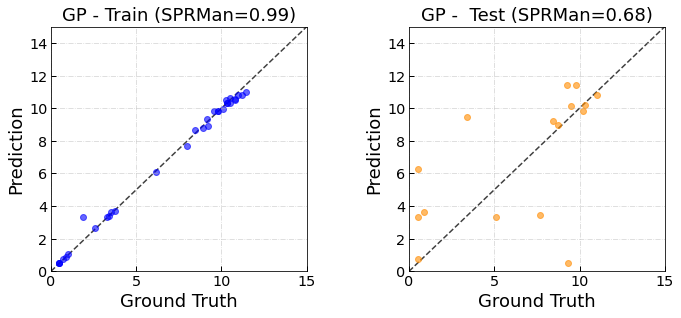

In [19]:
plt_true_vs_pred([y_train_org, y_test_org], 
                 [y_pred_train_org, y_pred_test_org], 
                 ['GP - Train','GP -  Test'],
                 ['blue', 'darkorange'])

## Random Forest of many regression models

### Train the model with all data

In [20]:
from sklearn.model_selection import train_test_split
## Train with all the data available before optimization 
X_train, X_test, y_train, y_test = train_test_split(X, y_norm, test_size = 0.01)

def regr_pred(regr_list, X):
    y_regr_pred = []
    i = 0
    for regr in regr_list:
        y_regr_pred.append(scalerY.inverse_transform(regr(X).reshape(-1,1)).ravel())
    return np.array(y_regr_pred)

def gpy_regr_predict(X, gpy_regr = gpy_regr):
    yc_pred, yc_uncer= gpy_regr.predict(X)
    return yc_pred.ravel()

regr_list = [NN_regr.predict, gb_regr.predict, rf_regr.predict, gpy_regr_predict]
rfr_reg_all = RandomForestRegressor(n_estimators=100, max_depth = 5)
rfr_reg_all.fit(np.transpose(regr_pred(regr_list, X_train)), y_train.ravel())
y_pred_train = rfr_reg_all.predict(np.transpose(regr_pred(regr_list, X_train)))
y_pred_test = rfr_reg_all.predict(np.transpose(regr_pred(regr_list, X_test)))

y_train_org = scalerY.inverse_transform(y_train.reshape(-1,1))
y_test_org = scalerY.inverse_transform(y_test.reshape(-1,1))
y_pred_train_org = scalerY.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = scalerY.inverse_transform(y_pred_test.reshape(-1,1))

RF Ensem - Train RMSE: 0.851
RF Ensem - Train MAE: 0.376
RF Ensem - Train MAPE: 0.111
RF Ensem - Train spearman coeff.: 0.989
RF Ensem -  Test RMSE: 1.548
RF Ensem -  Test MAE: 1.548
RF Ensem -  Test MAPE: 0.167
RF Ensem -  Test spearman coeff.: nan


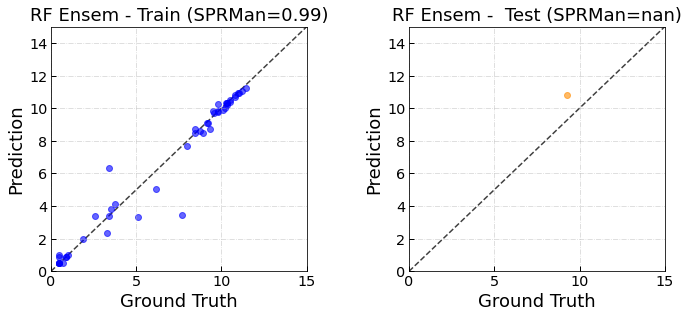

In [21]:
plt_true_vs_pred([y_train_org, y_test_org], 
                 [y_pred_train_org, y_pred_test_org], 
                 ['RF Ensem - Train','RF Ensem -  Test'],
                 ['blue', 'darkorange'])

### Use PSO to find the maximum

In [22]:
from pyswarm import pso
# Define bounds
# X_upper_bounds = [np.max(X[:,0]), np.max(X[:,1]), np.max(X[:,2]), np.max(X[:,3])]
# X_lower_bounds = [np.min(X[:,0]), np.min(X[:,1]), np.min(X[:,2]), np.min(X[:,3])]
X_upper_bounds = [1,1,1,1]
X_lower_bounds = [0,0,0,0]
def objective(X):
    """We want to maximize y (which means minimize -y)"""
    y_pred = rfr_reg_all.predict(np.transpose(regr_pred(regr_list, np.array([X]))))
    y_pred_org =  scalerY.inverse_transform(y_pred.reshape(-1,1))
    return -y_pred_org

# Run PSO 1 times with some generic hyper-parameters
X_opts = []
y_opts = []
n_runs = 1
for n in range(n_runs):
    print('running iteration No.', n+1)
    X_opt, _ = pso(
        objective, X_lower_bounds, X_upper_bounds,
        swarmsize=100, maxiter=100)
    X_opts.append(X_opt)
    y_opt = -objective(X_opt)
    y_opts.append(y_opt)
    print('optimized y: ', y_opt[0][0])
X_opts = np.asarray(X_opts)
y_opts = np.asarray(y_opts)
y_opt = np.max(y_opts)
X_opt = x_denormalizer([X_opts[np.argmax(y_opts)]])[0]

print('y_opt = ', np.around(y_opt,2))
print('X_opt = ', np.around(X_opt,2))

running iteration No. 1
Stopping search: maximum iterations reached --> 100
optimized y:  11.271008333333336
y_opt =  11.27
X_opt =  [  1.38 171.97 292.94  23.26]


In [23]:
from typing import Union
from emukit.core.acquisition import Acquisition
from emukit.core.interfaces import IModel, IDifferentiable
from emukit.core.loop import FixedIntervalUpdater, OuterLoop, SequentialPointCalculator
from emukit.core.loop.loop_state import create_loop_state
from emukit.core.optimization import AcquisitionOptimizerBase
from emukit.core.optimization import GradientAcquisitionOptimizer
from emukit.bayesian_optimization.acquisitions.log_acquisition import LogAcquisition
from emukit.bayesian_optimization.local_penalization_calculator import LocalPenalizationPointCalculator
from emukit.bayesian_optimization.acquisitions import ExpectedImprovement, \
                                                      NegativeLowerConfidenceBound, \
                                                      MaxValueEntropySearch, \
                                                      MultipointExpectedImprovement,\
                                                      ProbabilityOfFeasibility
from emukit.core.acquisition import IntegratedHyperParameterAcquisition

class ProbabilisticConstraintBayesianOptimizationLoop2(OuterLoop):
    def __init__(self, space: ParameterSpace, model_objective: Union[IModel, IDifferentiable],
                 model_constraint1: Union[IModel, IDifferentiable], 
                 model_constraint2: Union[IModel, IDifferentiable],
                 acquisition: Acquisition = None,
                 update_interval: int = 1, batch_size: int = 1):

        """
        Emukit class that implements a loop for building Bayesian optimization with an unknown constraint.
        For more information see:
        Michael A. Gelbart, Jasper Snoek, and Ryan P. Adams,
        Bayesian Optimization with Unknown Constraints,
        https://arxiv.org/pdf/1403.5607.pdf
        :param space: Input space where the optimization is carried out.
        :param model_objective: The model that approximates the underlying objective function
        :param model_constraint: The model that approximates the unknown constraints
        :param acquisition: The acquisition function for the objective function (default, EI).
        :param update_interval:  Number of iterations between optimization of model hyper-parameters. Defaults to 1.
        :param batch_size: How many points to evaluate in one iteration of the optimization loop. Defaults to 1.
        """

#         if not np.all(np.isclose(model_objective.X, model_constraint.X)):
#             raise ValueError('Emukit currently only supports identical '
#                              'training inputs for the constrained and objective model')
        self.model_objective = model_objective
        self.model_constraint1 = model_constraint1
        self.model_constraint2 = model_constraint2
        
        if acquisition is None:
            acquisition = ExpectedImprovement(model_objective)
        
        acquisition_constraint1 = ScaledProbabilityOfFeasibility(model_constraint1, max_value = 1, min_value = 0.5)
        acquisition_constraint2 = ScaledProbabilityOfFeasibility(model_constraint2, max_value = 1, min_value = 0.8)
        acquisition_constraint = acquisition_constraint1*acquisition_constraint2
        acquisition_constrained = acquisition * acquisition_constraint

        model_updater_objective = FixedIntervalUpdater(model_objective, update_interval)
        model_updater_constraint1 = FixedIntervalUpdater(model_constraint1, update_interval,
                                                        lambda state: state.Y_constraint1)
        model_updater_constraint2 = FixedIntervalUpdater(model_constraint2, update_interval,
                                                        lambda state: state.Y_constraint2)

        acquisition_optimizer = GradientAcquisitionOptimizer(space)
        if batch_size == 1:
            candidate_point_calculator = SequentialPointCalculator(acquisition_constrained, acquisition_optimizer)
        else:
            
            log_acquisition = LogAcquisition(acquisition_constrained)
            candidate_point_calculator = LocalPenalizationPointCalculator(log_acquisition, acquisition_optimizer,
                                                                          model_objective, space, batch_size)
        loop_state = create_loop_state(model_objective.X, model_objective.Y)
        
        #loop_state = create_loop_state(model_objective.X, model_objective.Y, Y_constraint=model_constraint.Y)

        super(ProbabilisticConstraintBayesianOptimizationLoop2, self).__init__(candidate_point_calculator,
                                                                              [model_updater_objective, model_updater_constraint1,model_updater_constraint2],
                                                                              loop_state)
#     def suggest_next_locations(self):
#         return self.candidate_point_calculator.compute_next_points(self.loop_state)
    
#     def acquisition_evaluate(self, X: loop_sate.X):
#         return acquisition.evaluate(X), acquisition_constraint.evaluate(X), acquisition_constrained.evaluate(X)

In [24]:
from typing import Tuple, Union
import scipy.stats
import numpy as np
from emukit.core.acquisition import Acquisition
from emukit.core.interfaces import IModel, IDifferentiable

class ScaledProbabilityOfFeasibility(Acquisition):

    def __init__(self, model: Union[IModel, IDifferentiable], jitter: float = float(0),
                 max_value: float = float(1), min_value: float = float(0)) -> None:
        """
        This acquisition computes for a given input point the probability of satisfying the constraint
        C<0. For more information see:
        Michael A. Gelbart, Jasper Snoek, and Ryan P. Adams,
        Bayesian Optimization with Unknown Constraints,
        https://arxiv.org/pdf/1403.5607.pdf
        :param model: The underlying model that provides the predictive mean and variance for the given test points
        :param jitter: Jitter to balance exploration / exploitation
        """
        self.model = model
        self.jitter = jitter
        self.max_value = max_value
        self.min_value = min_value

    def evaluate(self, x: np.ndarray) -> np.ndarray:
        """
        Computes the probability of of satisfying the constraint C<0.
        :param x: points where the acquisition is evaluated, shape (number of points, number of dimensions).
        :return: numpy array with the probability of satisfying the constraint at the points x.
        """
        mean, variance = self.model.predict(x)
        mean += self.jitter

        standard_deviation = np.sqrt(variance)
        cdf = scipy.stats.norm.cdf(0, mean, standard_deviation)
        return cdf*(self.max_value-self.min_value)+self.min_value

    def evaluate_with_gradients(self, x: np.ndarray) -> Tuple:
        """
        Computes the  probability of of satisfying the constraint C<0.
        :param x: points where the acquisition is evaluated, shape (number of points, number of dimensions).
        :return: tuple of numpy arrays with the probability of satisfying the constraint at the points x 
        and its gradient.
        """
        mean, variance = self.model.predict(x)
        standard_deviation = np.sqrt(variance)

        dmean_dx, dvariance_dx = self.model.get_prediction_gradients(x)
        dstandard_devidation_dx = dvariance_dx / (2 * standard_deviation)

        mean += self.jitter
        u = - mean / standard_deviation
        pdf = scipy.stats.norm.pdf(0, mean, standard_deviation)
        cdf = scipy.stats.norm.cdf(0, mean, standard_deviation)
        dcdf_dx = - pdf * (dmean_dx + dstandard_devidation_dx * u)

        return cdf*(self.max_value-self.min_value)+self.min_value, dcdf_dx

    @property
    def has_gradients(self):
        return isinstance(self.model, IDifferentiable)

### Create One Variable at a Time dataset. Change the step to make it easier for OVAT

In [71]:
MAPbI_conc_min, MAPbI_conc_max, MAPbI_conc_step = [1.2, 1.6, 0.2]  # Unit: V 
### Give step a scaling factor of 0.1 to avoid numercial errors such as 1.7000002
MAPbI_conc_var = np.arange(MAPbI_conc_min, MAPbI_conc_max+MAPbI_conc_step*0.1, MAPbI_conc_step)
MAPbI_conc_num = len(MAPbI_conc_var)

CH2I2_conc_min, CH2I2_conc_max, CH2I2_conc_step = [0, 250, 100] ## Unit: μL
CH2I2_conc_var = np.arange(CH2I2_conc_min, CH2I2_conc_max+CH2I2_conc_step*0.1, CH2I2_conc_step)
CH2I2_conc_num = len(CH2I2_conc_var)

PC_volt_min, PC_volt_max, PC_volt_step = [200, 440, 80] ## Unit: V
PC_volt_var = np.arange(PC_volt_min, PC_volt_max+PC_volt_step*0.1, PC_volt_step) 
PC_volt_num = len(PC_volt_var)

PC_len_min, PC_len_max, PC_len_step = [1, 100, 40]  ## Unit: ms
PC_len_var = np.arange(PC_len_min, PC_len_max+PC_len_step*0.1, PC_len_step)
PC_len_num = len(PC_len_var)



In [72]:
import random
variable_list = [np.linspace(0, 1, MAPbI_conc_num),
                 np.linspace(0, 1, CH2I2_conc_num),
                 np.linspace(0, 1, PC_volt_num),
                 np.linspace(0, 1, PC_len_num)]

convglen_list = []
convgeff_list = []
ovat_df_list = []
conv_batch_list = []

for m in range(100):
    x_ovat = []
    len_x_ovat = 0
    x_current_best = [np.ones(4)*0.5]
    n2 = 0
    #Generate a random initial condition
    for var_indx in np.arange(4):
        level_num = len(variable_list[var_indx])
        level_indx = np.random.randint(0,level_num,1)[0]  #Create a random number between 1 and variable list
        x_current_best[0][var_indx] =  variable_list[var_indx][level_indx] #Select 4 random number from the variable list
    
    for n in range(20):
        var_indx_array = np.arange(4)
        random.shuffle(var_indx_array) #randomnize which variable to start
        for v in var_indx_array:
            #generate a batch of new conditions
            for xx in variable_list[v]:#randomnize which variable to start ovat
                x_MAPbI_conc = x_current_best[0]
                x_MAPbI_conc[v] = xx
                x_ovat.append(x_MAPbI_conc.copy())#vary that random variable throughout the dimension
            x_ovat_original = x_denormalizer(x_ovat)
            df_ovat = pd.DataFrame(x_ovat_original, columns = x_labels)
            
            y_hat = rfr_reg_all.predict(np.transpose(regr_pred(regr_list, np.array(x_ovat)))) #use RF Ensemble to predict normalized PCE
            
            y_pred_ovat = scalerY.inverse_transform(y_hat.reshape(-1,1)) #denormalized to be the predicted PCE
            
            # Sort and find the best conditions
            df_ovat['Efficiency [%]'] = np.around(y_pred_ovat, 2)
            df_ovat= df_ovat.drop_duplicates(keep = 'last', ignore_index = True)
            x_current_best = x_normalizer([df_ovat.iloc[np.argmax(df_ovat['Efficiency [%]'].values)].values[:-1]])
            #the best condition can be recorded here.
            #print(np.max(df_ovat['Efficiency [%]']))
            #print(x_current_best)
        
        if len_x_ovat<len(df_ovat):
            len_x_ovat = len(df_ovat)
        elif n2 <= 4:
            n2 = n2+2
            variable_list = [np.linspace(0, 1, MAPbI_conc_num*n2),
                 np.linspace(0, 1, CH2I2_conc_num*n2),
                 np.linspace(0, 1, PC_volt_num*n2),
                 np.linspace(0, 1, PC_len_num*n2)]

        if len(df_ovat)>=100:
            break
            print('number of experiments:', len_x_ovat)
            print(np.max(df_ovat['Efficiency [%]']))
       
    
    #print('no more new conditions; so, random seeding')
    
    print('number of experiments:', len_x_ovat)
    print(np.max(df_ovat['Efficiency [%]']))
    print('batch', n*4)#number of batch - one variable per batch (with specified intevals)
    convglen_list.append(len_x_ovat)
    convgeff_list.append(np.max(df_ovat['Efficiency [%]']))
    ovat_df_list.append(df_ovat)
    conv_batch_list.append(n*4)

    print(x_normalizer([df_ovat.iloc[np.argmax(df_ovat['Efficiency [%]'].values)].values[:-1]]))
    df_ovat.iloc[np.argmax(df_ovat['Efficiency [%]'].values):np.argmax(df_ovat['Efficiency [%]'].values)+1]
            


number of experiments: 107
11.09
batch 28
[[0.54545455 0.8        0.4        0.2       ]]
number of experiments: 134
11.21
batch 8
[[0.45454545 0.63636364 0.4        0.18181818]]
number of experiments: 122
11.21
batch 8
[[0.45454545 0.63636364 0.4        0.18181818]]
number of experiments: 123
11.21
batch 8
[[0.45454545 0.63636364 0.4        0.18181818]]
number of experiments: 123
11.21
batch 8
[[0.45454545 0.63636364 0.4        0.18181818]]
number of experiments: 133
11.21
batch 8
[[0.45454545 0.63636364 0.4        0.18181818]]
number of experiments: 107
10.96
batch 8
[[0.27272727 0.72727273 0.46666667 0.18181818]]
number of experiments: 144
11.21
batch 8
[[0.45454545 0.63636364 0.4        0.18181818]]
number of experiments: 133
11.21
batch 8
[[0.45454545 0.63636364 0.4        0.18181818]]
number of experiments: 112
11.2
batch 8
[[0.54545455 0.63636364 0.4        0.18181818]]
number of experiments: 134
11.21
batch 8
[[0.45454545 0.63636364 0.4        0.18181818]]
number of experiments

number of experiments: 129
11.11
batch 8
[[0.45454545 0.81818182 0.4        0.18181818]]
number of experiments: 134
11.09
batch 8
[[0.54545455 0.90909091 0.4        0.18181818]]
number of experiments: 134
11.2
batch 8
[[0.54545455 0.81818182 0.4        0.18181818]]
number of experiments: 130
10.97
batch 8
[[0.27272727 0.63636364 0.46666667 0.18181818]]
number of experiments: 133
11.2
batch 8
[[0.54545455 0.81818182 0.4        0.18181818]]
number of experiments: 108
11.07
batch 8
[[0.63636364 0.90909091 0.4        0.18181818]]
number of experiments: 134
11.2
batch 8
[[0.54545455 0.81818182 0.4        0.18181818]]


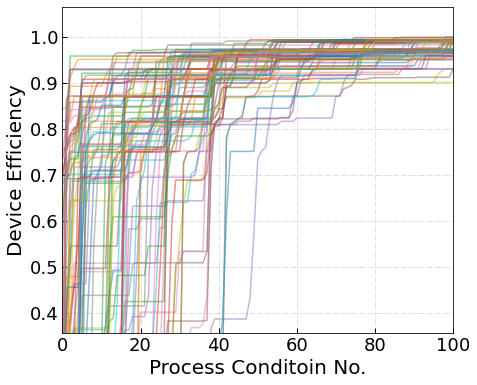

In [73]:
fs = 20
fig,axes = plt.subplots(1, 1, figsize=(7, 6), sharex = True)
ax = axes
for df_i in ovat_df_list:
    eff_max_acc = np.maximum.accumulate(df_i.iloc[:,-1])
    eff_acc = df_i.iloc[:,-1]
    ax.plot(range(len(eff_max_acc)),eff_max_acc/y_opt, alpha = 0.5)
#plt.scatter(range(len(eff_max_acc)),eff_acc)

# axes.text(80, 9, 'One Var at at Time', fontsize=fs*0.9)
# axes.text(80, 8, 'total conds = '+str(len(convglen_list)), fontsize=15)
axes.tick_params(direction='in', length=5, width=1, labelsize = fs*.9, grid_alpha = 0.5)
axes.set_ylim(4/y_opt,12/y_opt)
axes.set_xlim(0,100)

axes.grid(True, linestyle='-.')
axes.set_ylabel('Device Efficiency', fontsize = fs)
axes.set_xlabel('Process Conditoin No.', fontsize = fs)
plt.show()

In [29]:
 variable_list

[array([0.        , 0.09090909, 0.18181818, 0.27272727, 0.36363636,
        0.45454545, 0.54545455, 0.63636364, 0.72727273, 0.81818182,
        0.90909091, 1.        ]),
 array([0.        , 0.09090909, 0.18181818, 0.27272727, 0.36363636,
        0.45454545, 0.54545455, 0.63636364, 0.72727273, 0.81818182,
        0.90909091, 1.        ]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
        1.        ]),
 array([0.        , 0.09090909, 0.18181818, 0.27272727, 0.36363636,
        0.45454545, 0.54545455, 0.63636364, 0.72727273, 0.81818182,
        0.90909091, 1.        ])]

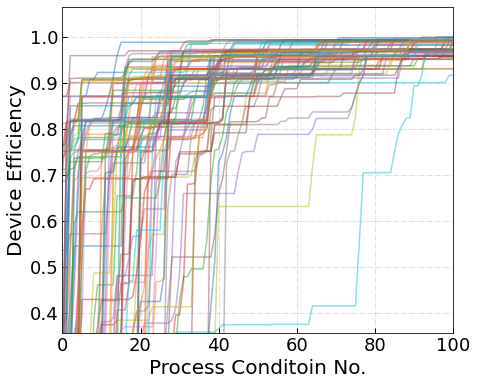

In [30]:
fs = 20
fig,axes = plt.subplots(1, 1, figsize=(7, 6), sharex = True)
ax = axes
eff_max_runlist = []
for df_i in ovat_df_list:
    eff_max_acc = np.maximum.accumulate(df_i.iloc[:,-1])
    eff_acc = df_i.iloc[:,-1]
    ax.plot(range(len(eff_max_acc)),eff_max_acc/y_opt, alpha = 0.5)
    eff_max_runlist.append(eff_max_acc[:100]/y_opt)
#plt.scatter(range(len(eff_max_acc)),eff_acc)

# axes.text(80, 9, 'One Var at at Time', fontsize=fs*0.9)
# axes.text(80, 8, 'total conds = '+str(len(convglen_list)), fontsize=15)
axes.tick_params(direction='in', length=5, width=1, labelsize = fs*.9, grid_alpha = 0.5)
axes.set_ylim(4/y_opt,12/y_opt)
axes.set_xlim(0,100)

axes.grid(True, linestyle='-.')
axes.set_ylabel('Device Efficiency', fontsize = fs)
axes.set_xlabel('Process Conditoin No.', fontsize = fs)
plt.show()

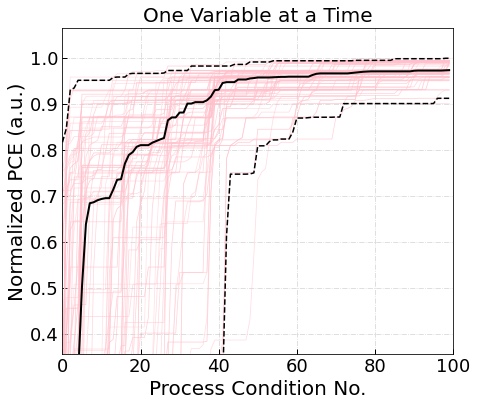

In [74]:
fs = 20
fig,axes = plt.subplots(1, 1, figsize=(7, 6), sharex = True)
ax = axes
i = 0
eff_max_runlist = []
for df_i in ovat_df_list:
    eff_max_acc = np.maximum.accumulate(df_i.iloc[:,-1])
    eff_acc = df_i.iloc[:,-1]
    i = i +1
    ax.plot(range(len(eff_max_acc[:100])), eff_max_acc[:100].values/y_opt, 
            alpha = 0.8*i/200+0.4,c = 'pink', linewidth=0.75)
    eff_max_runlist.append(eff_max_acc[:100]/y_opt)
#plt.scatter(range(len(eff_max_acc)),eff_acc)
line_95perc = np.percentile(eff_max_runlist, 99, axis = 0)
line_median = np.percentile(eff_max_runlist, 50, axis = 0)
line_5perc = np.percentile(eff_max_runlist, 1, axis = 0)

ax.plot(line_95perc,'--', c = 'black', linewidth=1.5)
ax.plot(line_median,'-', c = 'black', linewidth=2)
ax.plot(line_5perc,'--', c = 'black', linewidth=1.5)

#axes.text(80, 9, 'One Var at at Time', fontsize=fs*0.9)
#axes.text(80, 8, 'total conds = '+str(len(convglen_list)), fontsize=15)
axes.tick_params(direction='in', length=5, width=1, labelsize = fs*.9, grid_alpha = 0.5)
axes.set_ylim(4/y_opt,12/y_opt)
axes.set_xlim(0,100)

axes.grid(True, linestyle='-.')
axes.set_ylabel('Normalized PCE (a.u.)', fontsize = fs)
axes.set_xlabel('Process Condition No.', fontsize = fs)
axes.set_title('One Variable at a Time', fontsize = fs)
plt.show()

LHS_full_5perc, LHS_full_50perc, LHS_full_95perc= [line_5perc, line_median, line_95perc]

In [75]:
ovat_eff_runlist = []
for df_i in ovat_df_list:
    eff_acc = df_i.iloc[:,-1].values
    i = i +1
    ovat_eff_runlist.append(eff_acc[:101])

OVAT_list_df = pd.DataFrame(np.transpose(ovat_eff_runlist))
OVAT_list_df.to_excel("benckmark_OVAT_20220921.xls")
OVAT_list_df

 <ipython-input-75-f86aaa26f696>:8: FutureWarning:As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.55,9.20,0.50,8.27,0.50,7.84,3.48,0.50,2.21,7.90,...,0.50,3.84,0.50,0.73,0.88,0.50,1.75,0.51,0.87,0.50
1,1.94,9.21,0.50,8.68,0.50,8.54,4.29,0.50,2.78,7.35,...,0.50,7.84,0.50,3.41,0.89,0.50,8.77,0.51,3.44,0.50
2,0.50,9.24,1.05,8.89,0.61,8.71,4.22,0.53,5.76,7.85,...,0.50,8.57,0.50,3.47,3.40,0.50,9.49,0.51,3.45,0.50
3,3.38,9.81,2.72,8.89,0.71,8.74,5.72,0.71,7.05,6.07,...,0.50,8.67,0.50,3.64,4.32,0.50,9.27,0.51,1.16,0.50
4,0.50,9.30,3.42,8.96,0.89,9.20,5.23,0.58,7.82,7.75,...,0.50,8.75,0.50,7.79,5.22,0.50,9.20,0.50,0.89,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,10.97,1.64,8.78,7.75,8.89,9.81,9.20,9.87,9.81,10.82,...,1.09,7.75,8.45,10.76,3.51,1.56,1.25,7.95,9.28,8.89
97,11.09,8.98,9.18,8.78,8.45,10.33,10.96,10.29,10.33,10.48,...,8.78,8.78,8.08,10.80,9.64,8.46,9.20,3.77,10.49,7.95
98,10.91,10.89,9.19,9.18,5.11,10.97,10.48,10.81,10.97,9.30,...,10.94,9.18,3.55,10.35,10.78,10.79,10.48,3.37,11.07,3.77
99,10.35,10.26,9.33,9.19,3.39,11.20,10.13,11.14,11.20,9.18,...,10.26,9.19,3.39,9.91,10.11,10.27,10.13,0.99,10.93,3.37


In [58]:
eff_runlist = []
for df_i in ovat_df_list:
    eff_acc = df_i.iloc[:,-1].values
    i = i +1
    eff_runlist.append(eff_acc[:100])

In [59]:
eff_runlist

[array([ 9.81,  8.96,  8.44,  9.4 ,  0.96,  7.4 ,  9.8 , 10.23,  0.89,
        10.4 , 10.24, 10.2 ,  9.8 ,  9.8 ,  7.16,  9.06,  9.54, 10.67,
         9.37,  8.83,  3.63,  7.83,  9.12,  9.33, 10.78, 10.92, 10.78,
         9.47, 10.49, 10.92, 10.62,  9.27,  1.74,  9.97,  9.48,  8.55,
         8.29,  8.9 ,  9.73, 10.11,  9.19,  8.46,  9.3 , 10.37, 10.78,
        10.25,  8.97,  7.9 ,  9.18,  9.51, 10.95, 10.94, 10.48,  5.41,
         7.79,  8.88,  9.13,  9.56, 10.8 , 11.16, 10.78, 10.17, 10.  ,
         9.45,  9.1 ,  8.87,  8.46,  7.83,  3.65,  3.33,  9.25, 11.25,
        10.77, 10.22, 10.13,  9.81,  9.63,  9.28,  8.83,  8.68,  8.47,
         9.37,  9.74, 10.27, 10.82, 11.2 , 11.2 , 11.14, 10.89, 10.48,
        10.26,  9.26,  9.16,  7.73,  8.78,  9.18,  9.19,  9.3 , 10.33,
        11.09]),
 array([ 0.5 ,  0.5 ,  3.45,  3.47,  3.42,  3.48,  3.4 ,  0.87,  0.68,
         0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.89,  3.39,  3.42,  3.51,  3.59,
         3.57,  3.62,  3.42,  3.41,  3.63,  3.67,  5.27,  5.